We want to do a few toy cases for KDE mirroring to make sure we can actually implement this. First, we'll try a simple 1d case then move to a more advanced 2d case

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 1D Case

1.0000000000000004


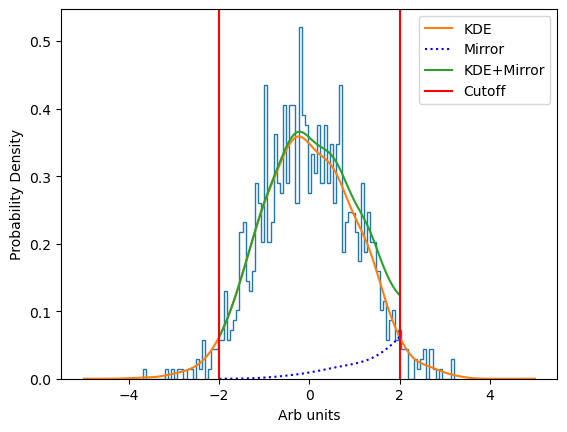

In [4]:
samples = np.random.normal(size=1000)
bins = 100

vals, bins = np.histogram(samples, bins=bins, density=True)
# now let's do the kde
kde = stats.gaussian_kde(samples)
print(np.sum(vals @ np.diff(bins)))

bin_centers = (bins[:-1]+bins[1:])/2
# want to continue the KDE out to a point
large_domain = np.hstack((
    np.linspace(-5, np.min(bin_centers)),
    bin_centers,
    np.linspace(np.max(bin_centers), 5)
))

plt.figure()
plt.hist(samples, bins=100, histtype='step', density=True)
# plt.plot(bin_centers, vals)

plt.plot(large_domain, kde(large_domain), label='KDE')

# now get the partial KDE over the domain (2, 4) and plot
mirrored_kde = kde(np.linspace(2,4, 100))[::-1]
plt.plot(
    np.linspace(-2, 2, 100),
    mirrored_kde,
    color='blue',
    linestyle=':',
    label='Mirror'
)
plt.plot(np.linspace(-2, 2, 100), kde(np.linspace(-2, 2, 100))+mirrored_kde, label='KDE+Mirror')
plt.axvline(-2, color='red', label='Cutoff')
plt.axvline(2, color='red')
plt.ylabel('Probability Density')
plt.xlabel('Arb units')
plt.legend()
plt.show()

50
(50, 50)
(50, 7)


/var/folders/xf/4xjcxwsx60s4g6c1mw4np0z40000gn/T/ipykernel_46669/2619478059.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


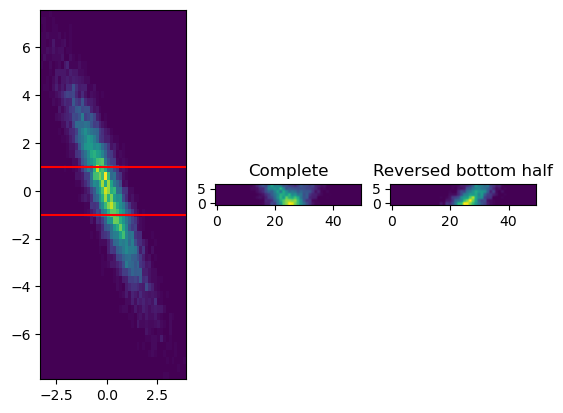

In [54]:
fig, (ill_ax, complete_ax, mirrored_ax) = plt.subplots(1, 3)
Xs = np.random.normal(size=100**2)
Ys = np.random.normal(size=100**2) - 2*Xs
h, xedges, yedges, _ = ill_ax.hist2d(
    Xs,
    Ys,
    bins=50,
    density=True
)
print(np.digitize(30, xedges) - 1)
print(h.shape)
# actually we can just digitize to get the values and sum directly here
# sum from -1 to -3
y_min_loc = np.digitize(-3, yedges) - 1
y_max_loc = np.digitize(-1, yedges) - 1
# mirrored_ax.plot((xedges[:-1]+xedges[1:])/2, np.sum(h[:, y_min_loc:y_max_loc],axis=1))
print(h[:, y_min_loc:y_max_loc].shape)

H, histo_xedges, histo_y_edges = np.histogram2d(Xs, Ys, bins=50, density=True)
# print(H[:,y_min_loc:y_max_loc].shape)
reversed = H[:,y_min_loc:y_max_loc][:,::-1]
mirrored_ax.imshow(
    reversed.T
)
mirrored_ax.invert_yaxis()

complete_ax.imshow(
    np.add(
        H[:,(np.digitize(-1, yedges)-1):(np.digitize(1, yedges))],
        reversed
    ).T
)
complete_ax.invert_yaxis()
# mirrored_ax.hist2d(
#     Xs,
#     Ys,
#     bins=50,
#     density=True
# )
# now 
complete_ax.set_title('Complete')
mirrored_ax.set_title('Reversed bottom half')
ill_ax.axhline(-1, color='red')
ill_ax.axhline(1, color='red')
fig.show()

In [ ]:
# from the scipy website

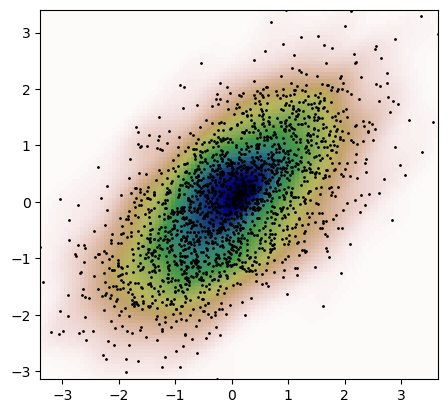

In [ ]:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()